In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('IEA-EV-dataEV_salesCarsHistorical.csv')
data = df.drop(['category', 'parameter', 'mode', 'unit'], axis=1)

# Converting value column to a more usable log.
data['log_value'] = data['value'].apply(lambda x: np.log(x))
df = data

encoded_data = pd.get_dummies(data, columns=['region', 'powertrain'])
x = encoded_data.drop(['log_value', 'value'], axis=1)
y = encoded_data[['log_value']]

model = KNeighborsRegressor(n_neighbors=5)
model.fit(x, y)

# Prediction of training data
train_prediction = model.predict(x)

# Checking error of KNN model with previous values
from sklearn import metrics

# Create DataFrame of predicted values
train_prediction = pd.DataFrame(train_prediction, columns=['log_values'])

# Converting back to usable values from log_values using exp
train_prediction['value'] = train_prediction['log_values'].apply(lambda x: np.exp(x)).astype(int)

# R squared Error
error_score = metrics.r2_score(data['value'], train_prediction['value'])
print("R squared Error:", error_score)


R squared Error: 0.20487042843723746


In [3]:
error_score = np.sqrt(mean_squared_error(data['value'], train_prediction['value']))
print("Root Mean Squared Error (RMSE):", error_score)

Root Mean Squared Error (RMSE): 362914.92796713515


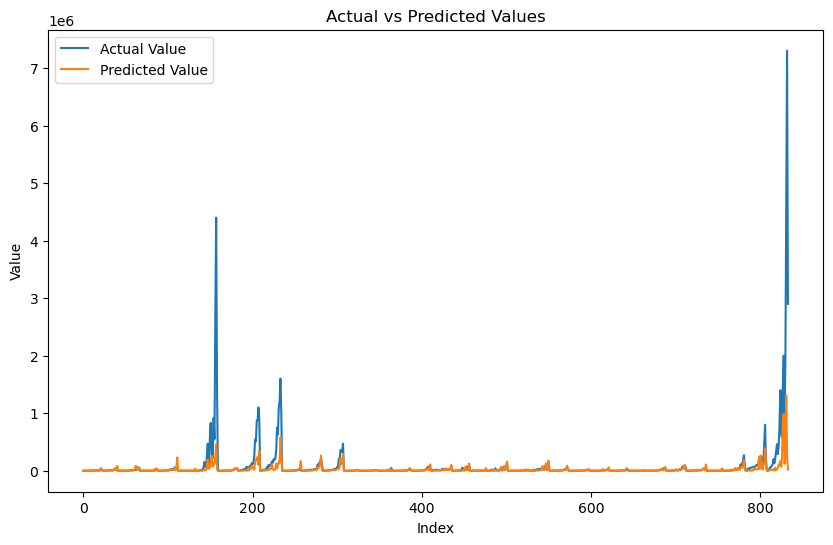

In [5]:
# Plotting the training error
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['value'], label='Actual Value')
plt.plot(data.index, train_prediction['value'], label='Predicted Value')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [6]:
future_data=pd.DataFrame({'year': [2023,2024,2025],
             'region': ['India','India','India'],
             'powertrain': ['BEV','BEV','BEV']})
future_data
# Perform one-hot encoding on the future data using the original encoder
encoded_future_data = pd.get_dummies(future_data, columns=['region', 'powertrain'])

encoded_future_data = encoded_future_data.reindex(columns=encoded_data.columns[:], fill_value=0)
encoded_future_data
# Remove the 'value' column from the encoded future data
encoded_future_data = encoded_future_data.drop(['value','log_value'], axis=1)
# Predict the values for future years
future_prediction = model.predict(encoded_future_data)
future_prediction
# Create DataFrame of predicted values
future_prediction = pd.DataFrame(future_prediction, columns=['log_values'])
# Converting back to usable values from log_values using exp
future_prediction['value'] = future_prediction['log_values'].apply(lambda x: np.exp(x))
future_prediction

,log_values,value
0,10.972039,58223.165998
1,11.497520,98471.213397
2,11.497520,98471.213397


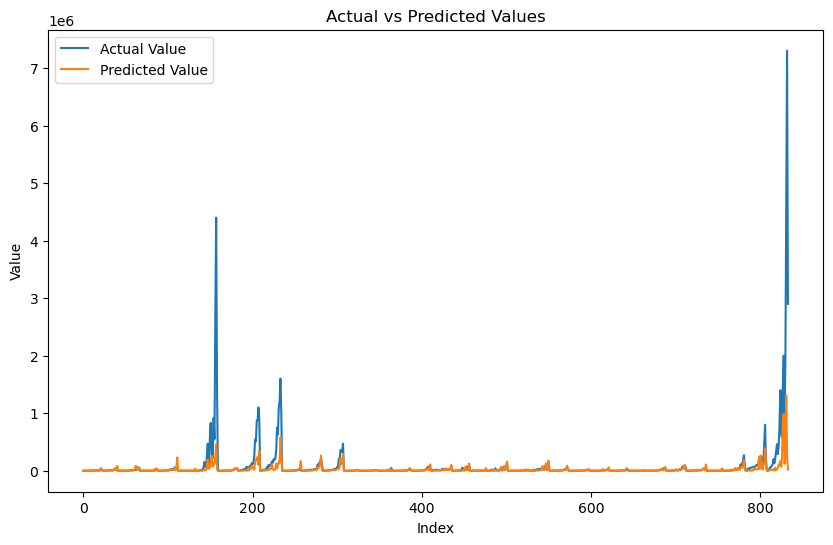

In [7]:
# Plotting the training error
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['value'], label='Actual Value')
plt.plot(data.index, train_prediction['value'], label='Predicted Value')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

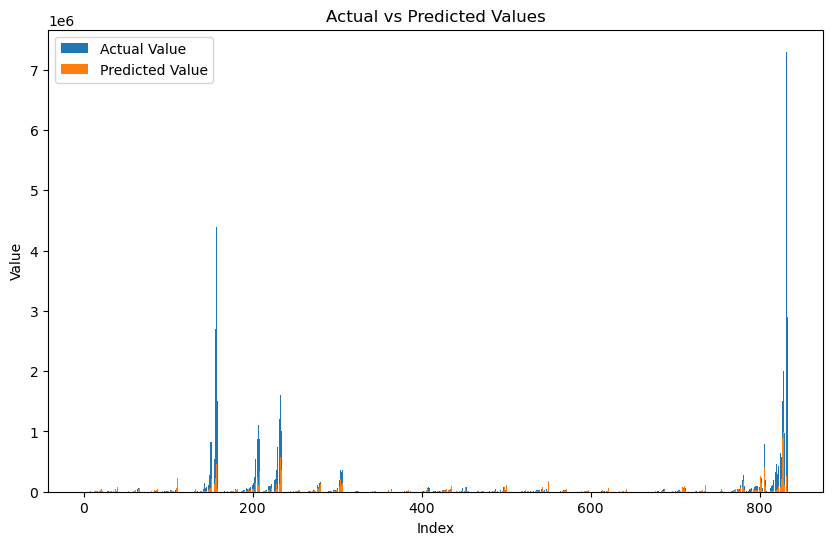

In [8]:
# Plotting the training error
plt.figure(figsize=(10, 6))
plt.bar(data.index, data['value'], label='Actual Value')
plt.bar(data.index, train_prediction['value'], label='Predicted Value')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()